## Model evaluation

In [1]:
import itertools
import seaborn as sns
from sklearn import preprocessing
from melanoma_utility_scripts import *

pd.set_option('max_colwidth', 120)
!ls /kaggle/input/melanomas-oof/

129-oof.csv  136-oof.csv  14-meta-oof.csv  147-oof.csv	    17-meta-oof.csv
131-oof.csv  137-oof.csv  140-oof.csv	   15-meta-oof.csv  18-meta-oof.csv
132-oof.csv  138-oof.csv  145-oof.csv	   150-oof.csv
134-oof.csv  139-oof.csv  146-oof.csv	   16-meta-oof.csv


In [2]:
model_paths = [
    ('/kaggle/input/melanomas-oof/129-oof.csv',          ['pred_last', 'pred_blend']),        #CV 0.934
    ('/kaggle/input/melanomas-oof/131-oof.csv',          ['pred_last']),                      #CV 0.930
    ('/kaggle/input/melanomas-oof/132-oof.csv',          ['pred_last', 'pred_blend']),        #CV 0.936
    ('/kaggle/input/melanomas-oof/134-oof.csv',          ['pred_last', 'pred_blend']),        #CV 0.934
    ('/kaggle/input/melanomas-oof/136-oof.csv',          ['pred_last', 'pred_blend']),        #CV 0.937
    ('/kaggle/input/melanomas-oof/137-oof.csv',          ['pred_last', 'pred_blend']),        #CV 0.933 | 0.935
    ('/kaggle/input/melanomas-oof/139-oof.csv',          ['pred_last', 'pred_blend']),        #CV 0.940 | 0.936
    ('/kaggle/input/melanomas-oof/140-oof.csv',          ['pred']),                           #CV 0.937
    ('/kaggle/input/melanomas-oof/145-oof.csv',          ['pred']),                           #CV 0.931
    ('/kaggle/input/melanomas-oof/146-oof.csv',          ['pred']),                           #CV 0.931
    ('/kaggle/input/melanomas-oof/147-oof.csv',          ['pred']),                           #CV 0.930
    ('/kaggle/input/melanomas-oof/150-oof.csv',          ['pred']),                           #CV 0.933
    
    # meta models
    ('/kaggle/input/melanomas-oof/14-meta-oof.csv',          ['pred']),                       #CV 0.773
    ('/kaggle/input/melanomas-oof/15-meta-oof.csv',          ['pred']),                       #CV 0.681
    ('/kaggle/input/melanomas-oof/16-meta-oof.csv',          ['pred']),                       #CV 0.681
    ('/kaggle/input/melanomas-oof/17-meta-oof.csv',          ['pred']),                       #CV 0.665
    ('/kaggle/input/melanomas-oof/18-meta-oof.csv',          ['pred']),                       #CV 0.783
]

oof_df = pd.read_csv(model_paths[0][0])[['image_name', 'target']]

for model_path, cols in model_paths:
    oof_df_ = pd.read_csv(model_path)
    oof_df_ = oof_df_[cols]
    ds_path = model_path.split('/')[4]
    if 'meta' in ds_path:
        model_num = ds_path[:7]
    else:
        model_num = ds_path[:3]
    for col in [col for col in oof_df_.columns if 'pred' in col]:
        oof_df[f'{col}_{model_num}'] = oof_df_[col]
        
display(oof_df.head())
display(oof_df.describe())

,image_name,target,pred_last_129,pred_blend_129,pred_last_131,pred_last_132,pred_blend_132,pred_last_134,pred_blend_134,pred_last_136,...,pred_140,pred_145,pred_146,pred_147,pred_150,pred_14-meta,pred_15-meta,pred_16-meta,pred_17-meta,pred_18-meta
0,ISIC_2637011,0,0.047175,0.047122,0.447666,0.144233,0.113562,0.146731,0.105807,0.044674,...,0.073045,0.070360,0.069572,0.088400,0.078864,0.090669,0.449205,0.425702,0.361196,0.262490
1,ISIC_0076262,0,0.019303,0.022246,0.042023,0.032375,0.030550,0.044929,0.041506,0.039752,...,0.022233,0.019294,0.016769,0.033027,0.018398,0.080347,0.444155,0.424776,0.362461,0.130832
2,ISIC_0074268,0,0.014166,0.015973,0.015378,0.016950,0.019770,0.017082,0.016000,0.028074,...,0.015810,0.019887,0.016345,0.019101,0.017660,0.090430,0.405665,0.378841,0.380684,0.267353
3,ISIC_0015719,0,0.010973,0.011731,0.012241,0.011653,0.017048,0.015682,0.015434,0.026075,...,0.019442,0.022765,0.018789,0.016894,0.021012,0.096609,0.444155,0.424776,0.362461,0.261717
4,ISIC_0082543,0,0.018701,0.022309,0.026864,0.015870,0.016545,0.017563,0.018125,0.032028,...,0.026526,0.022630,0.021952,0.017267,0.021365,0.080533,0.469115,0.440472,0.366689,0.155796


,target,pred_last_129,pred_blend_129,pred_last_131,pred_last_132,pred_blend_132,pred_last_134,pred_blend_134,pred_last_136,pred_blend_136,...,pred_140,pred_145,pred_146,pred_147,pred_150,pred_14-meta,pred_15-meta,pred_16-meta,pred_17-meta,pred_18-meta
count,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,...,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000
mean,0.017772,0.085292,0.074592,0.083578,0.079488,0.069714,0.079957,0.071417,0.091485,0.077802,...,0.076114,0.080580,0.077214,0.089348,0.076673,0.091145,0.458294,0.435723,0.381982,0.239030
std,0.132124,0.150469,0.127757,0.141650,0.142945,0.120125,0.144977,0.123079,0.154180,0.129079,...,0.140737,0.154552,0.155177,0.165754,0.152683,0.017614,0.072748,0.063147,0.056007,0.116169
min,0.000000,0.001452,0.007968,0.003968,0.003393,0.003055,0.001063,0.000572,0.000079,0.005138,...,0.008536,0.007281,0.001597,0.000870,0.008421,0.079871,0.334612,0.353200,0.315614,0.105437
25%,0.000000,0.020134,0.021674,0.020548,0.018735,0.021796,0.018333,0.020149,0.024872,0.024292,...,0.020841,0.018864,0.017427,0.018678,0.017643,0.080840,0.398903,0.378841,0.333588,0.149200
50%,0.000000,0.027646,0.028451,0.030246,0.026278,0.028262,0.026026,0.029709,0.033155,0.030611,...,0.026906,0.024202,0.021496,0.025725,0.022151,0.085131,0.451577,0.429651,0.379269,0.205581
75%,0.000000,0.066010,0.058435,0.069614,0.061878,0.054378,0.061492,0.057005,0.069858,0.060889,...,0.050884,0.048781,0.044435,0.060000,0.044359,0.094345,0.495735,0.466554,0.396815,0.291507
max,1.000000,0.999131,0.991605,1.000000,0.993183,0.984022,0.999131,0.997612,0.991775,0.988289,...,0.990640,0.999860,0.996252,0.999581,0.997968,0.529882,0.677833,0.636715,0.578624,0.732893


## Correlation heatmap

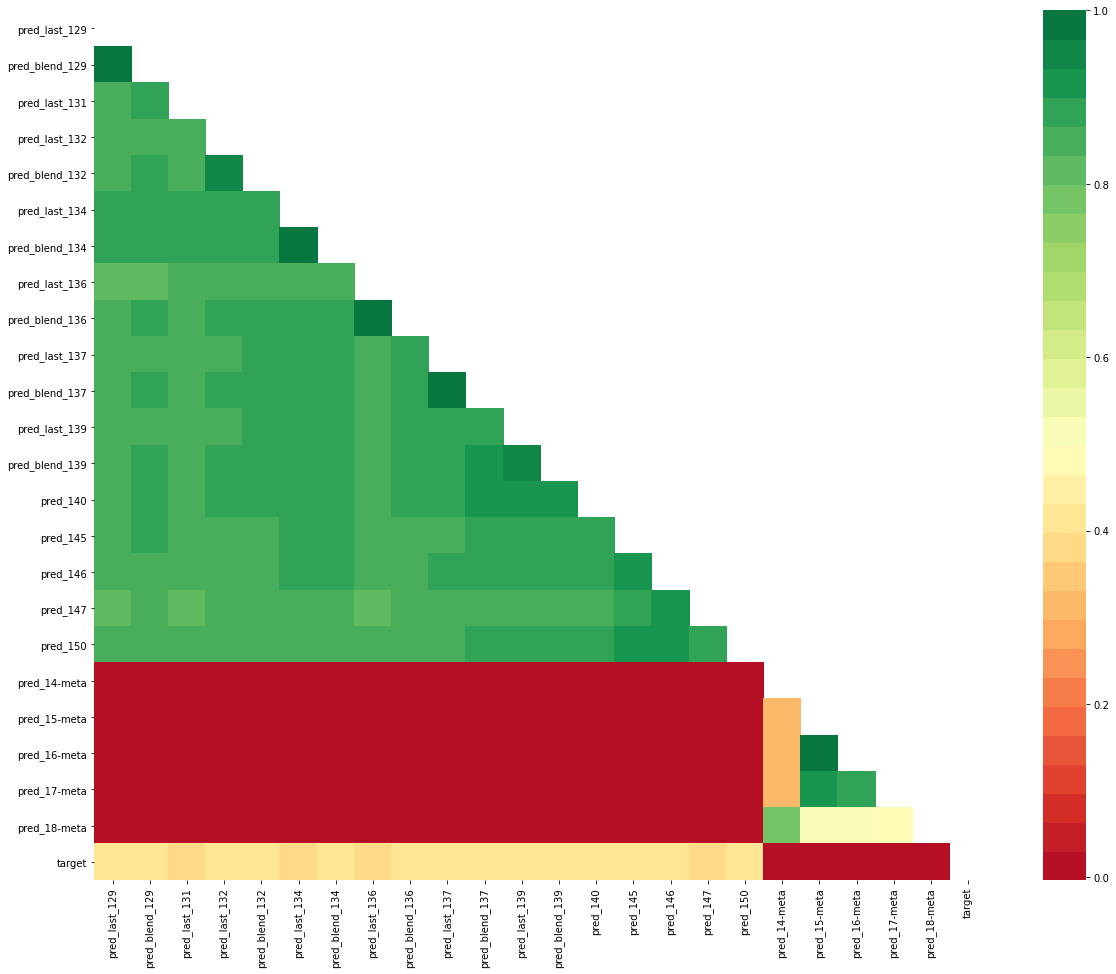

In [3]:
corr = oof_df[[col for col in oof_df.columns if 'pred' in col] + ['target']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 16))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette("RdYlGn", 30), mask=mask)
plt.show()

In [4]:
n_combinations = 3
scaler = preprocessing.MinMaxScaler()
powers = [2, 4, 8, 16]


for n_combination in range(2,  n_combinations+1):
    iter_comb = [pair for pair in itertools.combinations([col for col in oof_df.columns if ('pred_' in col) & (not 'meta' in col)], n_combination)]
    
    for permut in iter_comb:
        col_name = '-'.join(permut).replace('pred_', '')
        oof_df[col_name] = np.mean([oof_df[col] for col in permut], axis=0) # Simple average

#         oof_df[f'ranked_{col_name}'] = np.mean([oof_df[col].rank() for col in permut], axis=0)  # Ranked average
        
        oof_df[f'exp_log_{col_name}'] = np.mean([oof_df[col].apply(lambda x: np.log2(x)) for col in permut], axis=0) # Log Exp average
        
#         oof_df[f'scaled_{col_name}'] = np.mean([scaler.fit_transform(oof_df[col].values.reshape(len(oof_df), 1)).reshape(len(oof_df)) for col in permut], axis=0) # Simple average
        
#         # Power average
#         for power in powers:
#             oof_df[f'power_{power}_{col_name}'] = np.mean([oof_df[col]**power for col in permut], axis=0) # Power average
        
# display(oof_df.head())

In [5]:
cols = []
aucs = []
preds = []
 
for col in [col for col in oof_df.columns if '-' in col]:
    auc = roc_auc_score(oof_df['target'], oof_df[col])
    cols.append(col)
    aucs.append(auc)
    preds.append(col.count('-')+1)

oof_avg = pd.DataFrame(zip(cols, aucs, preds), columns=['Colum', 'AUC', 'Used preds']).sort_values(by=['AUC'], ascending=False)
display(oof_avg[oof_avg['Used preds'] == 2].head())
display(oof_avg[oof_avg['Used preds'] == 3].head())
display(oof_avg[oof_avg['Used preds'] == 4].head())

,Colum,AUC,Used preds
141,blend_132-last_139,0.944872,2
26,exp_log_last_129-last_139,0.944740,2
142,exp_log_blend_132-last_139,0.944676,2
115,last_132-last_139,0.944503,2
25,last_129-last_139,0.944471,2


,Colum,AUC,Used preds
414,exp_log_last_129-blend_132-last_139,0.946314,3
480,exp_log_last_129-last_136-last_139,0.946272,3
413,last_129-blend_132-last_139,0.946253,3
498,exp_log_last_129-blend_136-last_139,0.946235,3
388,exp_log_last_129-last_132-last_139,0.946137,3


,Colum,AUC,Used preds


# Ensemble with meta models

In [6]:
ensemble_cols = [col for col in oof_df.columns if ('-' in col) & (not 'meta' in col)]
meta_cols = [col for col in oof_df.columns if 'meta' in col]
meta_image_comb = list(itertools.product(meta_cols, ensemble_cols))


for meta_col, image_col in meta_image_comb:
    best_auc = 0
    best_weigt = 0
    for weight in range(1, 6): # Find best weights
        weight = weight/10
        auc = roc_auc_score(oof_df['target'], ((oof_df[image_col]*(1-weight)) + (oof_df[meta_col]*weight)))
        if auc > best_auc:
            best_auc = auc
            best_weigt = weight
            
    oof_df[f'{int(best_weigt*10)}{meta_col}*{image_col}'] = (oof_df[image_col]*(1-best_weigt)) + (oof_df[meta_col]*best_weigt) # Weighted average
            
# display(oof_df.head())

In [7]:
cols = []
aucs = []
preds = []
 
for col in [col for col in oof_df.columns if '*' in col]:
    auc = roc_auc_score(oof_df['target'], oof_df[col])
    cols.append(col)
    aucs.append(auc)
    preds.append(col.count('-')+1)

oof_avg = pd.DataFrame(zip(cols, aucs, preds), columns=['Colum', 'AUC', 'Used preds']).sort_values(by=['AUC'], ascending=False)
display(oof_avg[oof_avg['Used preds'] == 2].head())
display(oof_avg[oof_avg['Used preds'] == 3].head())
display(oof_avg[oof_avg['Used preds'] == 4].head())

,Colum,AUC,Used preds


,Colum,AUC,Used preds
21,1pred_14-meta*exp_log_last_129-last_139,0.944735,3
5835,1pred_17-meta*exp_log_last_129-last_139,0.944734,3
3897,1pred_16-meta*exp_log_last_129-last_139,0.944720,3
1959,1pred_15-meta*exp_log_last_129-last_139,0.944715,3
7773,1pred_18-meta*exp_log_last_129-last_139,0.944682,3


,Colum,AUC,Used preds
6223,1pred_17-meta*exp_log_last_129-blend_132-last_139,0.946314,4
409,1pred_14-meta*exp_log_last_129-blend_132-last_139,0.946305,4
4285,1pred_16-meta*exp_log_last_129-blend_132-last_139,0.946291,4
2347,1pred_15-meta*exp_log_last_129-blend_132-last_139,0.946285,4
6289,1pred_17-meta*exp_log_last_129-last_136-last_139,0.946268,4


# Best results

In [8]:
cols = []
aucs = []
preds = []
 
for col in [col for col in oof_df.columns if '-' in col]:
    auc = roc_auc_score(oof_df['target'], oof_df[col])
    cols.append(col)
    aucs.append(auc)
    preds.append(col.count('-')+1)

oof_avg = pd.DataFrame(zip(cols, aucs, preds), columns=['Colum', 'AUC', 'Used preds']).sort_values(by=['AUC'], ascending=False)
display(oof_avg.head(20))

,Colum,AUC,Used preds
414,exp_log_last_129-blend_132-last_139,0.946314,3
8166,1pred_17-meta*exp_log_last_129-blend_132-last_139,0.946314,4
2352,1pred_14-meta*exp_log_last_129-blend_132-last_139,0.946305,4
6228,1pred_16-meta*exp_log_last_129-blend_132-last_139,0.946291,4
4290,1pred_15-meta*exp_log_last_129-blend_132-last_139,0.946285,4
480,exp_log_last_129-last_136-last_139,0.946272,3
8232,1pred_17-meta*exp_log_last_129-last_136-last_139,0.946268,4
2418,1pred_14-meta*exp_log_last_129-last_136-last_139,0.946266,4
413,last_129-blend_132-last_139,0.946253,3
10104,1pred_18-meta*exp_log_last_129-blend_132-last_139,0.946250,4
